In [1]:
import pandas as pd
import os
from env import username, host, password
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import wrangle

In [2]:
df = wrangle.wrangle_zillow()

    bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  taxvaluedollarcnt  \
4          4.0          2.0                        3633.0           296425.0   
6          3.0          4.0                        1620.0           847770.0   
7          3.0          2.0                        2077.0           646760.0   
11         0.0          0.0                        1200.0             5328.0   
14         0.0          0.0                         171.0             6920.0   

    yearbuilt  taxamount    fips  
4      2005.0    6941.39  6037.0  
6      2011.0   10244.94  6037.0  
7      1926.0    7924.68  6037.0  
11     1972.0      91.60  6037.0  
14     1973.0     255.17  6037.0  


In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633,296425.0,2005,6941.39,60370
6,3,4.0,1620,847770.0,2011,10244.94,60370
7,3,2.0,2077,646760.0,1926,7924.68,60370
11,0,0.0,1200,5328.0,1972,91.60,60370
14,0,0.0,171,6920.0,1973,255.17,60370


In [4]:
df.columns = ['bedrooms','bathrooms','sq_feet','tax_value','year_built','tax_amount','fips']

<AxesSubplot:>

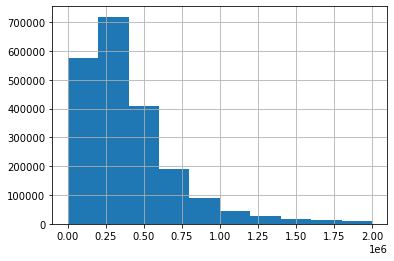

In [5]:
df.tax_value.hist()

In [6]:
train, test = train_test_split(df, random_state=123)
train, validate = train_test_split(train)

In [17]:
cols = ['sq_feet']

In [32]:
mm = sklearn.preprocessing.MinMaxScaler()


In [33]:
mm.fit(train[cols])
mm_train = mm.transform(train[cols])
#mm_validate = mm.transform(validate)
#mm_test = mm.transform(test)

In [34]:
std = sklearn.preprocessing.StandardScaler()

std.fit(train[cols])

std_train = std.transform(train[cols])
#std_validate = std.transform(validate)
#std_test = std.transform(test)

In [35]:
rob = sklearn.preprocessing.StandardScaler()

rob.fit(train[cols])

rob_train = rob.transform(train[cols])
#rob_validate = rob.transform(validate)
#rob_test = rob.transform(test)

In [36]:
qt = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
qt.fit(train[cols])

qt_train = qt.transform(train[cols])
#qt_validate = qt.transform(validate)
#qt_test = qt.transform(test)

Text(0.5, 1.0, 'Quantile')

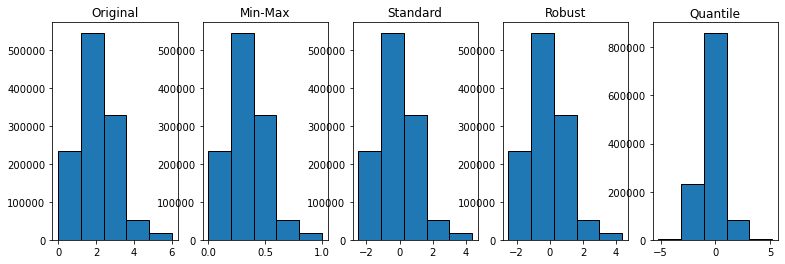

In [38]:
plt.figure(figsize=(13, 4))
plt.subplot(151)
plt.hist(train[cols], bins=5, ec='black')
plt.title('Original')
plt.subplot(152)
plt.hist(mm_train, bins=5, ec='black')
plt.title('Min-Max')
plt.subplot(153)
plt.hist(std_train, bins=5, ec='black')
plt.title('Standard')
plt.subplot(154)
plt.hist(rob_train, bins=5, ec='black')
plt.title('Robust')
plt.subplot(155)
plt.hist(qt_train, bins=5, ec='black')
plt.title('Quantile')

In [ ]:
inverse_mm_scaled = mm.inverse_transform(train[cols])
plt.hist(inverse_mm_scaled, bins=10, ec='black')
plt.show()